<a href="https://colab.research.google.com/github/gauthamk02/MushroomClassificationProject/blob/main/MushroomClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Classificaion
## Introduction
This project uses includes the training of a machine learning algorithm to classify mushrooms as edible or poisonous based on its different properties.

With over 18,000 species of mushrooms scientifically classified it becomes necessary to be aware of their characteristics. There are many species of mushrooms that are poisonous and can cause many adverse reactions from vomiting to even death in some cases. Mushrooms are a normal part of diet in many parts of the world and is enjoyed in different ways.So we must ensure that the mushrooms we consume are indeed safe and edible. But with all these many varieties and many of the toxic species having close physical resemblance to edible ones, it becomes hard to tell them apart.

With Machine Learning we can try to train a model that can classify the mushrooms as edible or poisonous based on their properties based on the currently available datasets.

**(Note) The Machine Learning model shown in this project is created for educational purposes and must never be used to identify a species as edible or poisonous in real life settings**

The necessary dataset for the training of the model was taken from [here](https://archive.ics.uci.edu/ml/datasets/mushroom) that mentions the source of this dataset as *Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf.*

## Dataset

>*This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.*<br>
>--<cite>Source</cite>

The required data is stored in a CSV file **mushrooms.csv** and it loaded into a Pandas DataFrame in the staring of the program.


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('https://raw.githubusercontent.com/gauthamk02/MushroomClassificationProject/main/mushrooms.csv')

### Processing the Data
df.head() gives the first 5 rows of the DataFrame<br>
Lets also see the shape of the DataFrame with df.shape

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


The Data that we have now is in categorical form and needs to be converted to ordinal form for this approach. Before doing that we need to convert each column to category type and then use the LabelEncoder() function to convert the column values to ordinal form. 

The labelmap saves saves the mapping of different categories to numbers in each column in dictionary form as it will be useful later for classifying mushrooms.

After converting we can see the new values by using head() function on the DataFrame.

**The definition and exaplanation of difference between categorial and ordinal form of data is beyond the scope of this project and interested readers can refer [this](https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/) to gat a basic understanding about them**

In [ ]:
df.astype('category')

labelmap = {}
labelencoder=LabelEncoder()

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
    labelmap[column] = dict(zip(labelencoder.classes_,range(len(labelencoder.classes_))))

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


The data needs to be split into testing and training parts to train and check the accuracy of the model

In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


## Training the classifier
The classifier needs to be trained and its accuracy should be tested with the prepared data.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


The Output gives 100% accuracy with the test data

## Training a Classifier to easily classify real Mushrooms

The above model was trainined and tested on the given dataset and gives good accuracy. However, to classify real mushrooms based of their traits, some changes should be made to the model. 

The current model uses 23 different features of a mushroom to classify it as edible or poisonous. In real life situations it will be extremely difficult for an inexperinced person to identify all these traits of a mushroom and would result in mis-identification the features of the mushroom which would ultimately cause the model to make inaccurate classification.

So the importance of different features in this model can be found and a different model can be trained based off of those selected features alone.

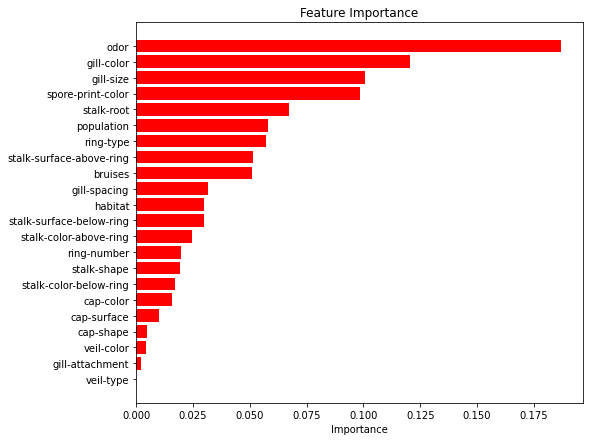

In [ ]:
features_list = X.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.draw()
plt.show()

After analysing the Feature importance graph, few important and easily identifiable features can be selected for training the new model.

Let the new features be odor, gill-color, gill-size, spore-print-color and gill-spacing. Another DataFrame can be created with these features alone and the same steps can be followed for training the model.

In [ ]:
new_features = ['odor', 'gill-color', 'gill-size', 'spore-print-color', 'gill-spacing']
df_new = df[['class'] + new_features]
X = df_new.drop(["class"], axis=1)
y = df_new["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 99.88%


## Testing the new model on real mushrooms

The new model trained on selected features has good accuracy and can be tested on real mushrooms.

The following mushrooms were selected to test against the model to ensure it works properly-
1. Agaricus Bisporous - Edible
2. Amanita Phalloides - Poisonous
3. Volvariella Volvacea - Edible
4. Lepiota Cristata - Poisonous

In [ ]:
agaricus_bisporus = {'Name': 'Agaricus Bisporous','gill-color': 'n', 'spore-print-color': 'n', 'gill-size': 'n', 'gill-spacing': 'w', 'odor': 'n'}
amanita_phalloides = {'Name': 'Amanita Phalloides','odor': 'f', 'gill-color': 'p',  'gill-size': 'b', 'spore-print-color': 'w', 'gill-spacing': 'w'}
volvariella_volvacea = {'Name': 'Volvariella Volvacea', 'gill-color': 'w', 'spore-print-color': 'w', 'gill-size': 'b', 'gill-spacing': 'c', 'odor': 'n'}
lepiota_cristata = {'Name': 'Lepiota Cristata', 'gill-color': 'w', 'spore-print-color':'w', 'gill-size':'b', 'gill-spacing': 'w', 'odor': 'f' }

mushrooms = [agaricus_bisporus, amanita_phalloides, volvariella_volvacea, lepiota_cristata]

In [ ]:
mushrooms

[{'Name': 'Agaricus Bisporous',
  'gill-color': 'n',
  'gill-size': 'n',
  'gill-spacing': 'w',
  'odor': 'n',
  'spore-print-color': 'n'},
 {'Name': 'Amanita Phalloides',
  'gill-color': 'p',
  'gill-size': 'b',
  'gill-spacing': 'w',
  'odor': 'f',
  'spore-print-color': 'w'},
 {'Name': 'Volvariella Volvacea',
  'gill-color': 'w',
  'gill-size': 'b',
  'gill-spacing': 'c',
  'odor': 'n',
  'spore-print-color': 'w'},
 {'Name': 'Lepiota Cristata',
  'gill-color': 'w',
  'gill-size': 'b',
  'gill-spacing': 'w',
  'odor': 'f',
  'spore-print-color': 'w'}]

But before classifying these mushrooms we need convert their feature values to corresponding integers they were mapped to by LabelEncoder in the original Dataframe. For that the labelmap dictionary can be used. The label mapping of the features in this model are.

In [ ]:
for feature, mapping in labelmap.items():
  if feature in new_features:
    print(f"{feature}: {mapping}")

odor: {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
gill-spacing: {'c': 0, 'w': 1}
gill-size: {'b': 0, 'n': 1}
gill-color: {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
spore-print-color: {'b': 0, 'h': 1, 'k': 2, 'n': 3, 'o': 4, 'r': 5, 'u': 6, 'w': 7, 'y': 8}


Now the values of features in mushrooms should be mapped back to the original LabelEncoder() mapping

In [ ]:
for mushroom in mushrooms:
    for key in new_features:
        mushroom[key] = labelmap[key][mushroom[key]]
pprint.pprint(mushrooms)

[{'Name': 'Agaricus Bisporous',
  'gill-color': 5,
  'gill-size': 1,
  'gill-spacing': 1,
  'odor': 5,
  'spore-print-color': 3},
 {'Name': 'Amanita Phalloides',
  'gill-color': 7,
  'gill-size': 0,
  'gill-spacing': 1,
  'odor': 2,
  'spore-print-color': 7},
 {'Name': 'Volvariella Volvacea',
  'gill-color': 10,
  'gill-size': 0,
  'gill-spacing': 0,
  'odor': 5,
  'spore-print-color': 7},
 {'Name': 'Lepiota Cristata',
  'gill-color': 10,
  'gill-size': 0,
  'gill-spacing': 1,
  'odor': 2,
  'spore-print-color': 7}]


Now mushrooms list can be converted to a DataFrame and their class can be predicted with the newly trained model.

While passing the DataFrame for prediction, it is necessary that the order of columns in the passed DataFrame is same as the one the model was trained. It can be ensured by passing the training models columns order as a list to the DataFrame whose values we are predicting.

In [ ]:
df_test = pd.DataFrame(mushrooms)

In [ ]:
df_test

,Name,gill-color,spore-print-color,gill-size,gill-spacing,odor
0,Agaricus Bisporous,5,3,1,1,5
1,Amanita Phalloides,7,7,0,1,2
2,Volvariella Volvacea,10,7,0,0,5
3,Lepiota Cristata,10,7,0,1,2


Classifying the data and storing it in an array

In [ ]:
class_ = rf.predict(df_test[X_train.columns])
print(class_) 

[0 1 0 1]


This array can be added as the class column to the DataFrame.

To check that out model classified them accurately we can check the label mapping for class and compare the classified Data along with their name

In [ ]:
df_test['class'] = class_
print(f"Label mapping of class: {labelmap['class']}")
print(df_test[['Name', 'class']])

Label mapping of class: {'e': 0, 'p': 1}
                   Name  class
0    Agaricus Bisporous      0
1    Amanita Phalloides      1
2  Volvariella Volvacea      0
3      Lepiota Cristata      1


The classifications are accurate and shows that the model is working when classifying real mushrooms.

## References
#### Dataset
 - https://archive.ics.uci.edu/ml/datasets/mushroom

#### Random Forest Classification
 - https://www.javatpoint.com/machine-learning-random-forest-algorithm
 - https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
 - Custom Youtube Playlist - https://www.youtube.com/playlist?list=PL6hUQCYXoCBPbe4ViMJ2L0gPaJDk-9xGM 

#### Code
 - https://medium.com/analytics-vidhya/mushroom-classification-using-different-classifiers-aa338c1cd0ff  

#### Mushrooms
 - https://www.first-nature.com/fungi/agaricus-bisporus.php
 - https://www.first-nature.com/fungi/amanita-phalloides.php
 - https://www.first-nature.com/fungi/lepiota-cristata.php
 - https://en.wikipedia.org/wiki/Volvariella_volvacea
 